In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set ()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score


Linear Regression

In [3]:
param = pd.read_csv('./final_data/final_data.csv')

In [5]:
param['station'].unique()

array(['mc010', 'mc032', 'mc042', 'mc077', 'mc085', 'mc117', 'mc124',
       'mc143', 'mc171', 'mc174'], dtype=object)

In [6]:
param.drop(param.loc[param['station']=='mc077'].index, inplace=True)

In [7]:
param['station'].unique()

array(['mc010', 'mc032', 'mc042', 'mc085', 'mc117', 'mc124', 'mc143',
       'mc171', 'mc174'], dtype=object)

In [8]:
param[param['station']=='mc143']

,datetime,source_id,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,...,visibility,wind_gust_direction,wind_gust_speed,sensor_station,station,core,component,period,pm10,traffic_avg_value
2555,2019-01-01,6894.0,0.050000,1016.958333,2.444444,6.620833,277.083333,28.870833,89.500000,3.150000,...,21729.166667,277.083333,50.945833,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,32.0,NaN
2556,2019-01-02,6894.0,0.008333,1023.732083,6.111111,1.841667,325.833333,27.095833,55.000000,-4.933333,...,44416.666667,309.166667,45.825000,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,13.0,NaN
2557,2019-01-03,6894.0,0.004167,1032.772917,0.000000,-0.308333,316.250000,16.850000,40.375000,-3.800000,...,49583.333333,316.666667,25.550000,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,17.0,NaN
2558,2019-01-04,6894.0,0.029167,1027.440833,0.000000,2.108333,282.500000,16.700000,95.666667,0.637500,...,17945.833333,280.000000,27.670833,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,19.0,NaN
2559,2019-01-05,6894.0,0.050000,1019.895833,1.222222,6.070833,284.166667,19.491667,87.833333,4.137500,...,29550.000000,267.083333,31.333333,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2019-12-27,6894.0,0.020833,1029.577083,2.722222,3.108333,308.750000,13.145833,84.083333,1.541667,...,31375.000000,297.500000,22.245833,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,12.0,NaN
2916,2019-12-28,6894.0,0.000000,1041.673333,0.000000,1.266667,322.083333,11.508333,94.583333,-2.750000,...,57916.666667,293.750000,17.354167,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,11.0,NaN
2917,2019-12-29,6894.0,0.000000,1039.211250,14.555556,-0.050000,196.250000,6.737500,70.625000,-3.666667,...,43958.333333,199.583333,14.050000,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,21.0,NaN
2918,2019-12-30,6894.0,0.000000,1028.435417,0.666667,4.504167,212.500000,12.400000,73.708333,-5.004167,...,55416.666667,213.333333,22.650000,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,25.0,NaN


In [245]:
param[param['station']=='mc042']

,datetime,source_id,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,...,visibility,wind_gust_direction,wind_gust_speed,sensor_station,station,core,component,period,pm10,traffic_avg_value
730,2019-01-01,6894.0,0.050000,1016.958333,2.444444,6.620833,277.083333,28.870833,93.166667,3.150000,...,19775.000000,277.083333,50.945833,042 Neukölln,mc042,pm10,pm10_24h,24h,25.0,NaN
731,2019-01-02,6894.0,0.008333,1023.732083,6.111111,1.841667,325.833333,27.095833,47.250000,-4.933333,...,41375.000000,309.166667,45.825000,042 Neukölln,mc042,pm10,pm10_24h,24h,11.0,NaN
732,2019-01-03,6894.0,0.004167,1032.772917,0.000000,-0.308333,316.250000,16.850000,58.625000,-3.800000,...,44125.000000,316.666667,25.550000,042 Neukölln,mc042,pm10,pm10_24h,24h,11.0,NaN
733,2019-01-04,6894.0,0.029167,1027.440833,0.000000,2.108333,282.500000,16.700000,95.666667,0.637500,...,16341.666667,280.000000,27.670833,042 Neukölln,mc042,pm10,pm10_24h,24h,15.0,NaN
734,2019-01-05,6894.0,0.050000,1019.895833,1.222222,6.070833,284.166667,19.491667,92.041667,4.137500,...,22241.666667,267.083333,31.333333,042 Neukölln,mc042,pm10,pm10_24h,24h,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2019-12-27,6894.0,0.020833,1029.577083,2.722222,3.108333,308.750000,13.145833,83.541667,1.541667,...,26583.333333,297.500000,22.245833,042 Neukölln,mc042,pm10,pm10_24h,24h,9.0,NaN
1091,2019-12-28,6894.0,0.000000,1041.673333,0.000000,1.266667,322.083333,11.508333,86.583333,-2.750000,...,46458.333333,293.750000,17.354167,042 Neukölln,mc042,pm10,pm10_24h,24h,8.0,NaN
1092,2019-12-29,6894.0,0.000000,1039.211250,14.555556,-0.050000,196.250000,6.737500,71.625000,-3.666667,...,47083.333333,199.583333,14.050000,042 Neukölln,mc042,pm10,pm10_24h,24h,16.0,NaN
1093,2019-12-30,6894.0,0.000000,1028.435417,0.666667,4.504167,212.500000,12.400000,69.625000,-5.004167,...,46666.666667,213.333333,22.650000,042 Neukölln,mc042,pm10,pm10_24h,24h,16.0,NaN


In [9]:
param[param['station']=='mc143']

,datetime,source_id,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,...,visibility,wind_gust_direction,wind_gust_speed,sensor_station,station,core,component,period,pm10,traffic_avg_value
2555,2019-01-01,6894.0,0.050000,1016.958333,2.444444,6.620833,277.083333,28.870833,89.500000,3.150000,...,21729.166667,277.083333,50.945833,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,32.0,NaN
2556,2019-01-02,6894.0,0.008333,1023.732083,6.111111,1.841667,325.833333,27.095833,55.000000,-4.933333,...,44416.666667,309.166667,45.825000,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,13.0,NaN
2557,2019-01-03,6894.0,0.004167,1032.772917,0.000000,-0.308333,316.250000,16.850000,40.375000,-3.800000,...,49583.333333,316.666667,25.550000,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,17.0,NaN
2558,2019-01-04,6894.0,0.029167,1027.440833,0.000000,2.108333,282.500000,16.700000,95.666667,0.637500,...,17945.833333,280.000000,27.670833,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,19.0,NaN
2559,2019-01-05,6894.0,0.050000,1019.895833,1.222222,6.070833,284.166667,19.491667,87.833333,4.137500,...,29550.000000,267.083333,31.333333,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2019-12-27,6894.0,0.020833,1029.577083,2.722222,3.108333,308.750000,13.145833,84.083333,1.541667,...,31375.000000,297.500000,22.245833,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,12.0,NaN
2916,2019-12-28,6894.0,0.000000,1041.673333,0.000000,1.266667,322.083333,11.508333,94.583333,-2.750000,...,57916.666667,293.750000,17.354167,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,11.0,NaN
2917,2019-12-29,6894.0,0.000000,1039.211250,14.555556,-0.050000,196.250000,6.737500,70.625000,-3.666667,...,43958.333333,199.583333,14.050000,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,21.0,NaN
2918,2019-12-30,6894.0,0.000000,1028.435417,0.666667,4.504167,212.500000,12.400000,73.708333,-5.004167,...,55416.666667,213.333333,22.650000,143 Silbersteinstraße,mc143,pm10,pm10_24h,24h,25.0,NaN


In [10]:
df = param

In [11]:
station_name = df['station'].unique()

In [49]:
y_hat_all = []
for s1 in station_name:
    for s2 in station_name:
        for s3 in station_name:
            if s1!=s2 and s2!=s3 and s3!=s1:
#                 print(s1)
#                 print(s2)
#                 print(s3)
                st1 = df[df['station']==s1].reset_index()
                st1 = st1.loc[:, ['precipitation', 'pressure_msl', 'sunshine', 'temperature', 'relative_humidity', 'pm10']]
                st1.columns = ['precipitation1', 'pressure_msl1', 'sunshine1', 'temperature1', 'relative_humidity1', 'pm101']
                st2 = df[df['station']==s2].reset_index()
                st2 = st2.loc[:, ['precipitation', 'pressure_msl', 'sunshine', 'temperature', 'relative_humidity', 'pm10']]
                st2.columns = ['precipitation2', 'pressure_msl2', 'sunshine2', 'temperature2', 'relative_humidity2', 'pm102']
                st3 = df[df['station']==s3].reset_index()
                st3 = st3.loc[:, ['precipitation', 'pressure_msl', 'sunshine', 'temperature', 'relative_humidity', 'pm10']]
                st3.columns = ['precipitation3', 'pressure_msl3', 'sunshine3', 'temperature3', 'relative_humidity3', 'pm103']
                st = pd.concat([st1, st2, st3], axis=1)
        #        print(st.isna().sum())
                st.dropna(inplace=True)
        #        print(st.isna().sum())
                x = st[['precipitation1', 'pressure_msl1', 'sunshine1', 'temperature1',
               'relative_humidity1', 'pm101', 'precipitation2', 'pressure_msl2',
               'sunshine2', 'temperature2', 'relative_humidity2', 'pm102']]
                y = df[df['station']==s3]['pm10']
                y = st[['pm103']]
                x_train = x[:int(x.shape[0]*0.9)]
#                 print(x_train.shape)
                y_train = y[:int(y.shape[0]*0.9)]
                x_test = x[int(x.shape[0]*0.9):]
                y_test = y[int(y.shape[0]*0.9):]
                clf = LinearRegression().fit(x_train, y_train)
                y_hat = clf.predict(x_test)
                mse = mean_squared_error(y_hat, y_test, squared = False)
                accuracy = accuracy_score(list(y_test['pm103'].values), [float(round(x)) for [x] in y_hat])
                y_hat_all += [{'s3_val' : s3, 'y_hat_val' : y_hat, 'mse' : mse, 'accuracy': accuracy}]
                # print(y_hat_all)
                # print(mean_squared_error(clf.predict(x_test) ,y_test, squared = False))
                # print(y_test)


In [45]:
y_hat = [float(round(x, 2)) for [x] in y_hat]

In [55]:
y_hat_all2 = y_hat_all

In [56]:
for i in y_hat_all2:
    i['y_hat_val'] = [list(i) for i in list(i['y_hat_val'])]

In [66]:
y_test.values

array([[56.],
       [35.],
       [22.],
       [12.],
       [11.],
       [20.],
       [34.],
       [19.],
       [21.],
       [31.],
       [37.],
       [29.],
       [12.],
       [11.],
       [12.],
       [20.],
       [24.],
       [27.],
       [34.],
       [14.],
       [10.],
       [20.],
       [38.],
       [23.],
       [38.],
       [36.],
       [25.],
       [28.],
       [19.],
       [17.],
       [14.],
       [14.],
       [12.],
       [11.],
       [21.],
       [25.]])

In [67]:
y_hat

array([[54.41827505],
       [35.08296706],
       [23.45842611],
       [10.33196618],
       [12.09856939],
       [18.28895044],
       [28.06504079],
       [19.80180222],
       [21.93513261],
       [28.01185667],
       [36.9073248 ],
       [28.83884016],
       [11.7736395 ],
       [ 9.98454913],
       [13.5741086 ],
       [20.77830695],
       [27.29513457],
       [25.75121172],
       [32.77990482],
       [14.9724564 ],
       [10.96523208],
       [20.99420207],
       [26.77924356],
       [20.57730603],
       [35.60733998],
       [35.55857842],
       [23.5677579 ],
       [30.55089619],
       [17.77299104],
       [16.97358033],
       [13.60908324],
       [12.92562835],
       [12.07597982],
       [10.98465334],
       [19.9366319 ],
       [16.90647812]])

In [71]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Actual vs Predicted - Linear Regression')

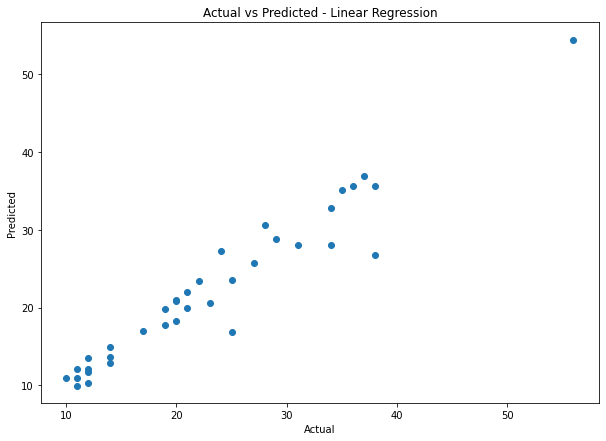

In [72]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test.values, y_hat)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Linear Regression')

In [74]:
param.corr()

,source_id,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,pm10,traffic_avg_value
source_id,1.000000,-0.002025,0.011041,0.019936,0.035704,-0.010935,-0.012034,-0.004437,0.019035,-0.042006,-0.022202,-0.015533,-0.003716,-0.050059,NaN
precipitation,-0.002025,1.000000,-0.244105,-0.151789,0.059504,-0.030626,0.053439,0.213560,0.215015,0.246838,-0.160737,-0.031622,0.093806,-0.144166,NaN
pressure_msl,0.011041,-0.244105,1.000000,0.296800,-0.001187,0.086937,-0.274713,-0.341300,-0.174734,-0.301180,0.182936,0.074170,-0.305603,0.043633,NaN
sunshine,0.019936,-0.151789,0.296800,1.000000,0.589292,-0.275994,-0.219821,-0.820867,0.269890,-0.739244,0.486574,-0.279016,-0.173966,0.101329,NaN
temperature,0.035704,0.059504,-0.001187,0.589292,1.000000,-0.095845,-0.168695,-0.338142,0.880304,-0.563622,0.473027,-0.084346,-0.096373,-0.093040,NaN
wind_direction,-0.010935,-0.030626,0.086937,-0.275994,-0.095845,1.000000,0.270706,0.273315,-0.025434,0.125967,0.087767,0.990101,0.261645,-0.353250,NaN
wind_speed,-0.012034,0.053439,-0.274713,-0.219821,-0.168695,0.270706,1.000000,0.193816,-0.194479,-0.025054,0.115350,0.276174,0.977995,-0.289358,NaN
cloud_cover,-0.004437,0.213560,-0.341300,-0.820867,-0.338142,0.273315,0.193816,1.000000,-0.039883,0.612021,-0.407684,0.277326,0.176531,-0.147323,NaN
dew_point,0.019035,0.215015,-0.174734,0.269890,0.880304,-0.025434,-0.194479,-0.039883,1.000000,-0.113094,0.184881,-0.008140,-0.138202,-0.136518,NaN
relative_humidity,-0.042006,0.246838,-0.301180,-0.739244,-0.563622,0.125967,-0.025054,0.612021,-0.113094,1.000000,-0.710332,0.131759,-0.080101,-0.020365,NaN


In [58]:
import json

In [59]:
with open('./final_data/y_hat_all.json', 'w') as fl:
    json.dump(y_hat_all2, fl)